### Ponderada Spotify

Primeiramente para a realização da ponderada, é preciso importar todas as bibiliotecas que irão aixiliar neste projeto. Sendo elas ferramentas fundamentais na manipulação, análise e visualização de grandes volumes de dados de maneira eficiente. OFerecendo funções e estruturas otimizadas para realizar tarefas comuns de processamento e exploração de dados. 

In [90]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

#### Limpeza e Tratamento de Valores Nulos

A limpeza e o tratamento de valores nulos são fundamentais para a criação do modelo preditivo. Isso é evidente quando possuimos valores nulos e outiliers, de modo que quando estivermos treinando nosso modelo, ele seja influenciado por valores exorbitantes e que foge do habitual. Por exemplo se usarmos o kmeans do qual agrupa objetos semelhantes e ao definir os centroides pode haver um determinado outilier que sozinho gere um centroide por se destiguir dos demais, impactando assim negativamente o modelo do qual estamos criando. 

Já quando se trata de valores nulos, a maioria dos modelos não conseguem lidar com estes, podendo resultar em erros de execução ou em problemas de convergência durante o treinamento do modelo. 

Sendo assim, iremos fazer agora a limpeza dos nossos dados, além de também importa-los para que os dados estejam disponíveis para o treinamento do modelo preditivo. 

In [91]:
df_train = pd.read_csv('test.csv')
df_test = pd.read_csv('test.csv')

A fim de identifcar o formato dos dados e visualizar a tabela, eu utilizei a função head, esta que me mostra as cinco primeiras linhas da tabela. Nesta não consegui observar nenhum erro, principalmente por representar uma amostra muito pequena dos dados.

In [92]:
df_train.head() 



,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,113186,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,42819,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,59311,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,91368,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,61000,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


Já para ver tanto os tipos das váriaveis da minha tabela, tanto o número de valores nulos, utilizei a função "Info", olhando os dados anteriormente e comparando com os tipos, vi que todos estavam corretos e que batiam com que estavam sendo exibidos na função info. Mas um ponto que me deixou em alerta foi a presença de um valor nulo nas colunas artists, album_name e track_name, evidencias essas que foram percebidas pelo número de linhas que é 34200 que não bate com com os 34199 dessas três colunas.

In [93]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34200 entries, 0 to 34199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_unique_id   34200 non-null  int64  
 1   track_id          34200 non-null  object 
 2   artists           34199 non-null  object 
 3   album_name        34199 non-null  object 
 4   track_name        34199 non-null  object 
 5   duration_ms       34200 non-null  int64  
 6   explicit          34200 non-null  bool   
 7   danceability      34200 non-null  float64
 8   energy            34200 non-null  float64
 9   key               34200 non-null  int64  
 10  loudness          34200 non-null  float64
 11  mode              34200 non-null  int64  
 12  speechiness       34200 non-null  float64
 13  acousticness      34200 non-null  float64
 14  instrumentalness  34200 non-null  float64
 15  liveness          34200 non-null  float64
 16  valence           34200 non-null  float6

Sendo assim, já pedi para printar a linha desses valores e descobri que se tratava de uma linha, da qual não exclui pois se trata de uma linha com informações que não vão impactar meu modelo, pois se trata de nomes o que não irei utilizar para testar meu modelo.

In [94]:
linhas_com_nulos = df_train[df_train.isnull().any(axis=1)]
print(linhas_com_nulos)

      track_unique_id                track_id artists album_name track_name  \
7668            65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

      duration_ms  explicit  danceability  energy  key  loudness  mode  \
7668            0     False         0.501   0.583    7     -9.46     0   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
7668       0.0605          0.69           0.00396    0.0747    0.734  138.391   

      time_signature track_genre  
7668               4       k-pop  


Agora vou utilizar a fução describe para ver se possuem alguns valores que não correspondem com os valores determinados no enunciado do projeto, pois estes podem prejudicar meu modelo com informações que não correspondem com a realidade. 

In [95]:
df_train.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,34200.000000,3.420000e+04,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000
mean,56670.513889,2.283254e+05,0.565591,0.641041,5.314035,-8.247806,0.637135,0.084423,0.314750,0.153087,0.214113,0.473605,122.314152,3.907485
std,32710.184506,1.123471e+05,0.174544,0.251737,3.554899,5.014973,0.480834,0.105910,0.332552,0.306634,0.191084,0.259849,30.062414,0.428702
min,3.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28612.500000,1.733250e+05,0.455000,0.472000,2.000000,-10.039000,0.000000,0.035800,0.016600,0.000000,0.098200,0.256000,99.537500,4.000000
50%,56475.500000,2.131775e+05,0.579000,0.683000,5.000000,-6.984000,1.000000,0.048700,0.168500,0.000043,0.133000,0.463000,122.052500,4.000000
75%,84855.750000,2.616720e+05,0.693000,0.853000,8.000000,-5.011000,1.000000,0.084700,0.597000,0.045800,0.273000,0.682000,140.204000,4.000000
max,113999.000000,4.730302e+06,0.980000,1.000000,11.000000,1.795000,1.000000,0.963000,0.996000,1.000000,1.000000,0.992000,243.372000,5.000000


Analisando esses dados percebi que havia algo de errado com o min do decribe, pois não tem como uma música ter duração 0 e time_signature menor que 4, sendo assim quis investigar melhor esses dados, fazendo uma lógica que exibisse os dados que possuissem valores da coluna time_signature menor que 3 e depois que possui duretion_ms = 0. No caso da duração, percebi que se tratava da mesma linha que já havia visto anteriomente, como essa linha pode ser problematica no futuro, uma vez que vou escolher as features e duração pode ser um fator, resolvi apagar essa, ainda mais que se trata só de uma.

In [96]:
linhas_filtradas = df_train[ (df_train['duration_ms'] == 0)]
print(linhas_filtradas)
df_train = df_train.drop(linhas_filtradas.index)


      track_unique_id                track_id artists album_name track_name  \
7668            65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

      duration_ms  explicit  danceability  energy  key  loudness  mode  \
7668            0     False         0.501   0.583    7     -9.46     0   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
7668       0.0605          0.69           0.00396    0.0747    0.734  138.391   

      time_signature track_genre  
7668               4       k-pop  


In [97]:
linhas_filtradas = df_train[(df_train['time_signature'] < 3) ]
print(linhas_filtradas)
print(f"Quantidade de linhas filtradas: {len(linhas_filtradas)}")

       track_unique_id                track_id  \
59              101043  4xu38KnbRHbRHRwdg4KFul   
351              16558  6mbHaLohxTHM1HtI7XdJYl   
360              74151  33Yl7zo5qhJXgvO4VsAQTs   
420              55613  3oSood6sgulWxhrkTJvXbH   
554              54417  6ym5ZwHzAHnQYfYu1HyWNE   
...                ...                     ...   
33776           101417  0XvG65b2KbCUT4NDvjTAXm   
33855             9892  4zmRo7Flwb6bzx2J0Yel6Q   
33972            81965  73y649QhnXdcm6fRdvfraO   
34016            31809  6AbVJjzv7thIvmMCuhZrmK   
34143            32056  12IT9FwJuLloQ00BBqrqh2   

                                         artists  \
59                                    Fan Sounds   
351                              Kishori Amonkar   
360                               Maria Bethânia   
420                          H Dixit;Lofi Person   
554                                     Tineidae   
...                                          ...   
33776  Rain for Deep Sleep;Yoga;The

Já que a maioria das linhas possuem informações na coluna time_signature igual a 4, sendo esse número presente até cerca da faixa dos 75%, decidi substituir esses valores por 4, que representaria a moda dessa coluna e sendo a média também um valor bem perto.

In [98]:
df_train.loc[df_train['time_signature'] < 3, 'time_signature'] = 4

Além disso busquei ver se tinha valores nas colunas 'track_id', 'artists', 'album_name' e 'track_name', que eram repitidos e obtive o número de 2869. Logo já deixei uma unidade de cada uma das duplicatas e removi o restante. Vale ressaltar que removi estes valores por se tratar de músicas repetidas que contrnham mesmas informações, o que poderia prejudicar no treinamento do meu modelo.

In [105]:
soma_duplicados = df_train[['track_id', 'artists', 'album_name', 'track_name']].duplicated(keep='first').sum()
df_train_sem_duplicatas = df_train.drop_duplicates(subset=['track_id', 'artists', 'album_name', 'track_name'], keep='first')
print(f"Número total de duplicatas: {soma_duplicados}")


Número total de duplicatas: 2869


Para descobrir possíveis outliers, escolhi algumas colunas e utilizei o bloxpot. Este tipo de gráfico que mostra basicamente em que linha dos valores está cada um dos meus dados, dessa forma, é possível visualizar alguns que fogem do padrão. Como é o caso dos dados de duração que me chamaram atenção pelos valores altos presentes, sendo assim os adequei e coloquei para que estes possuissem os mesmos valores de tempo que a média, considerei valores acima de 3. Outro ponto que me chamou a atenção foi o tempo, onde possui dois valores longe dos demais, fiz então a mesma coisa que fiz com a duração, com os valores menores que 100.

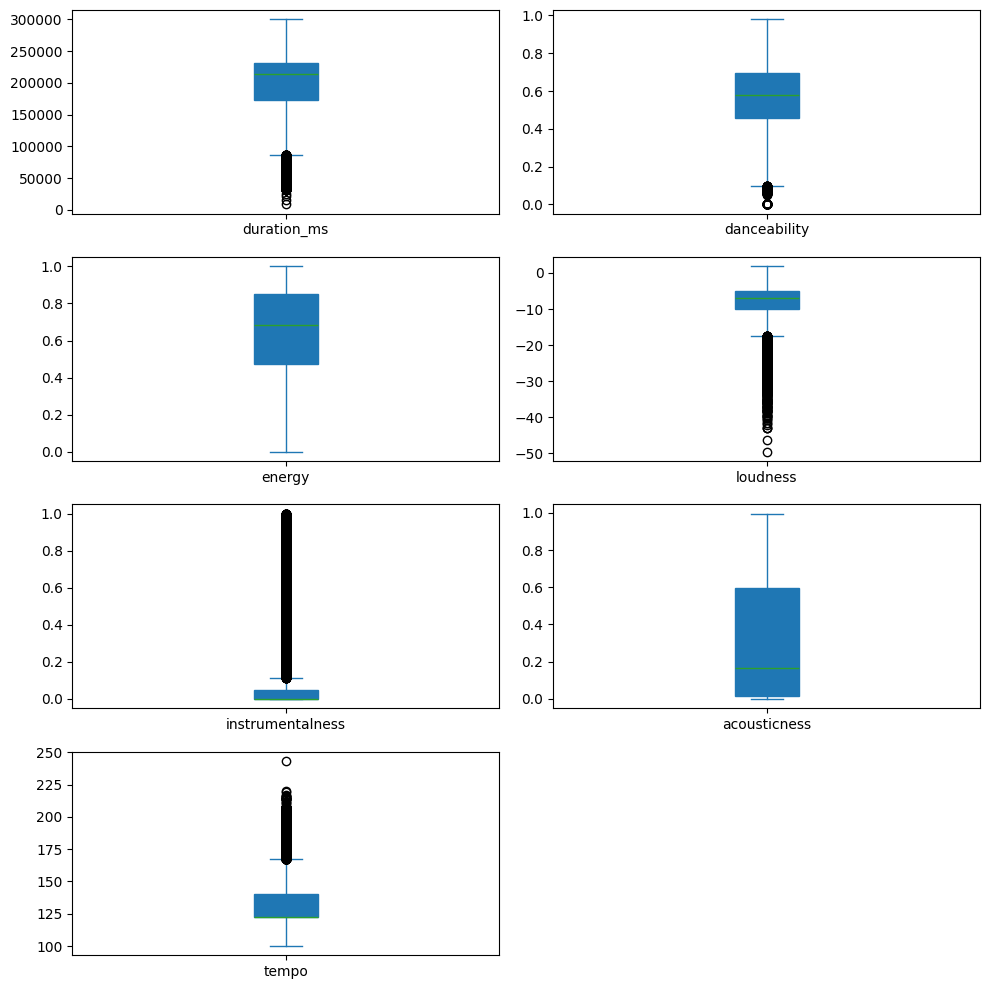

In [107]:
columns_to_plot = ['duration_ms', 'danceability', 'energy', 'loudness', 'instrumentalness', 'acousticness', 'tempo']

df_train[columns_to_plot].plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10), patch_artist=True)

plt.tight_layout()
plt.show()


In [106]:
mean_duration_ms = df_train['duration_ms'].mean()
df_train.loc[df_train['duration_ms'] > 300000, 'duration_ms'] = mean_duration_ms


mean_tempo = df_train['tempo'].mean()
df_train.loc[df_train['tempo'] < 100, 'tempo'] = mean_tempo

Agora, após fazer isso no primeiro data frame, repeti esses passos de limpeza para todos.